In [83]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
import time

In [84]:
# Record start time
start_time = time.time()

# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Use 5000 samples and normalize pixel values
X = mnist.data[:5000].astype(float) / 255.0 #MUST NORMALIZE
y = mnist.target[:5000].astype(int)

print(f"X dtype: {X.dtype}, y dtype: {y.dtype}")
print(f"Unique labels in y: {np.unique(y)}")

X dtype: float64, y dtype: int32
Unique labels in y: [0 1 2 3 4 5 6 7 8 9]


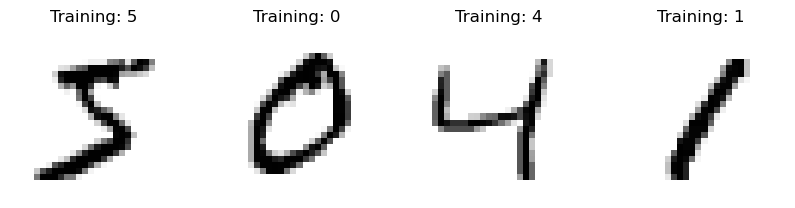

In [85]:
# Plot sample images
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X[:4], y[:4]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")
plt.show()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=42)

clf = SVC(gamma=0.001)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

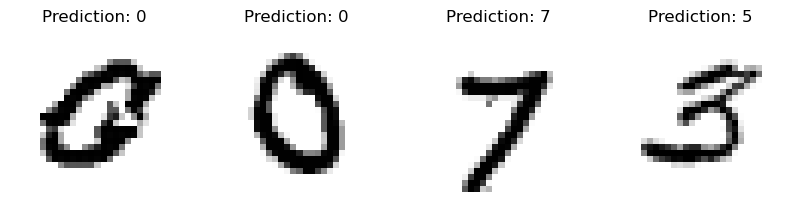

In [87]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test[:4], predicted[:4]):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
plt.show()

In [ ]:
svm_new = SVC()
param_grid = { # try to find a trend for the parameters, small dataset is still fine
    'C': np.linspace(0.01,0.5,10), 
    'kernel': ['rbf'], 
    'gamma': np.linspace(0.05, 1, 10)
}

grid_search = GridSearchCV(svm_new, param_grid, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
accuracy = accuracy_score(y_test, predicted)
print(accuracy)

# Calculate elapsed time
elapsed_time = time.time() - start_time
print(f"Script executed in {elapsed_time:.4f} seconds")

In [ ]:
results = grid_search.cv_results_
C_values = param_grid['C']
gamma_values = param_grid['gamma']
mean_train_scores = results['mean_train_score'].reshape(len(C_values), len(gamma_values))
mean_test_scores = results['mean_test_score'].reshape(len(C_values), len(gamma_values))

In [ ]:
fixed_C_index = 0
fixed_C = C_values[fixed_C_index] #2 dimensional indexing

train_errors = 1 - mean_train_scores[fixed_C_index, :] 
test_errors = 1 - mean_test_scores[fixed_C_index, :]

plt.figure(figsize=(8, 5))
plt.plot(gamma_values, train_errors, marker='o', label='Train Error')
plt.plot(gamma_values, test_errors, marker='x', label='Test Error')
plt.xlabel('Gamma (complexity)')
plt.ylabel('Error')
plt.title(f'Train vs Test Error, Fixed C')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
fixed_gamma_index = 0
fixed_gamma = gamma_values[fixed_gamma_index]

train_errors = 1 - mean_train_scores[:, fixed_gamma_index]
test_errors = 1 - mean_test_scores[:, fixed_gamma_index]

plt.figure(figsize=(8, 5))
plt.plot(C_values, train_errors, marker='o', label='Train Error')
plt.plot(C_values, test_errors, marker='x', label='Test Error')
plt.xlabel('C (complexity)')
plt.ylabel('Error')
plt.title(f'Train vs Test Error, Fixed Gamma')
plt.legend()
plt.grid(True)
plt.show()